# Milestone 1

Esta *milestone* consiste en emplear tres métodos numéricos distintos (el método de Euler, el método de Runge-Kutta de orden 4 (RK4) y el método de Crank-Nicolson) para resolver el problema de Kepler adimensionalizado, dado por el problema del valor inicial
$$
\begin{cases}
\ddot{\mathbf{r}}=-\frac{\mathbf{r}}{r^{3}},\\
\mathbf{r}(0)=\begin{pmatrix}1\\0\end{pmatrix},\\
\dot{\mathbf{r}}(0)=\begin{pmatrix}0\\1\end{pmatrix},
\end{cases}
$$
donde $\mathbf{r}(t)$ es el vector posición en el instante $t$. Definiendo $\mathbf{U}=(\mathbf{r}, \dot{\mathbf{r}})^{T}$, y la función $\mathbf{F}(\mathbf{U},t)=(\dot{\mathbf{r}}, -\frac{\mathbf{r}}{r^{3}})^{T}$, el problema se puede expresar como

$$
\begin{cases}
\frac{d\mathbf{U}}{dt}=\mathbf{F}(\mathbf{U},t),\\
\mathbf{U}(0)=(1,0,0,1)^{T}.
\end{cases}
$$

A continuación se muestra una implementación de $\mathbf{F}(\mathbf{U},t)$ junto con la importación de librerías necesarias para las secciones siguientes, en las que se aplicarán los métodos numéricos correspondientes.

In [41]:
from numpy import array, concatenate, zeros
from numpy.linalg import norm, solve
import matplotlib.pyplot as plt

def F(U):
    """
    Returns F(U)=(\\dot{r}, -r/|r|^3), where r is the position vector.
    """
    r = U[0:2]
    rd = U[2:4]

    return concatenate((rd, -r/norm(r)**3), axis=None)

## 1.1. Resolución mediante el método de Euler

El método de Euler surge de discretizar la integración directa de la ecuación diferencial ordinaria. Tomando un intervalo de tiempo en el cual esté definido el problema, y $n\in\{0,\dots,N-1\}$, $N\in \mathbb{N}$, con $\mathbf{U}^{n}$ representando el valor de $\mathbf{U}$ en el instante $t_{n}$, se tiene que
$$
\int_{\mathbf{U}^{n}}^{\mathbf{U}^{n+1}}d\mathbf{U}=\int_{t_{n}}^{t_{n+1}}\mathbf{F}(\mathbf{U})dt
$$
Discretizando la ecuación anterior por diferencias finitas, se obtiene, finalmente
$$
\mathbf{U}^{n+1} = \mathbf{U}^{n}+\mathbf{F}(\mathbf{U}^{n}, t_{n})\Delta t,
$$
donde $\Delta t = t_{n+1}-t_{n}$. A continuación se aplica el método numérico y se representa gráficamente el resultado para (INSERTAR PARÁMETROS)

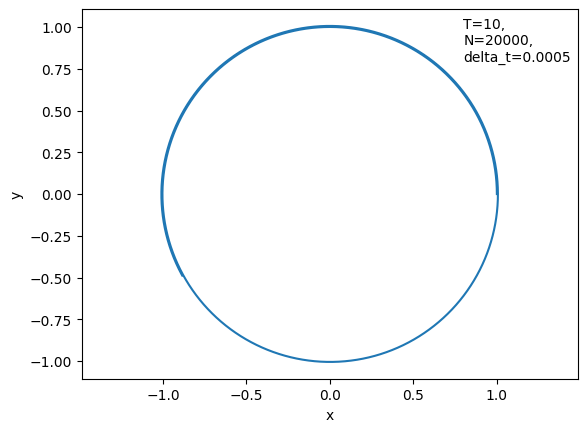

In [42]:
T = 10   # Intervalo de tiempo a integrar.
N = 20000 # Número de índices temporales para el método de Euler.
delta_t = T/N 
U = zeros((N+1, 4))

U[0, :] = array([1, 0, 0, 1]) 

for n in range(0, N):
    # Compute each step of Euler's method    
    U[n+1,:] = U[n,:] + delta_t * F(U[n, :])

plt.axis("equal")
plt.plot(U[:, 0], U[:, 1], label=f"N={N}, delta_t={delta_t}")
plt.xlabel("x")
plt.ylabel("y")
plt.text(x=0.8, y=0.8, s=f"T={T},\nN={N},\ndelta_t={delta_t}")
plt.show()

## 1.2. Resolución mediante el método de Crank-Nicolson

El método de Clark-Nicolson combina los métodos de Euler explícito e implícito para resolver ecuaciones diferenciales en derivadas parciales del tipo $\frac{\partial u}{\partial t}=F\left(u,x,t,\frac{\partial u}{\partial x}, \frac{\partial^{2}u}{\partial x^{2}}\right)$. En general, si se toma $u^{n}_{i}$ como el valor de $u$ en el instante $t_{n}$ y en la coordenada $x_{i}$, se tiene la ecuación implícita

$$
\frac{u_{i}^{n+1}-u_{i}^{n}}{\Delta t} = \frac{1}{2}\left[F_{i}^{n+1}\left(u,x,t,\frac{\partial u}{\partial x}, \frac{\partial^{2}u}{\partial x^{2}}\right)+F^{n}_{i}\left(\frac{\partial u}{\partial x}, \frac{\partial^{2}u}{\partial x^{2}}\right)\right].
$$

En general, $F$ debe discretizarse y la ecuación implícita debe resolverse numéricamente para hallar $u_{i}^{n+1}$. Particularizando para el problema de Kepler, se obtiene la función y considerando que $\mathbf{F}$ no tiene una dependencia explícita en el tiempo, la función objetivo cuya raíz es el valor de $\mathbf{U}^{n+1}$ es

$$
\frak{F}(\mathbf{U}^{n+1})=\frac{1}{2}\left[\mathbf{F}(\mathbf{U}^{n+1})+\mathbf{F}(\mathbf{U}^{n})\right]-\frac{\mathbf{U}^{n+1}-\mathbf{U}^{n}}{\Delta t}.
$$

La solución de $\frak{F}=0$ se hallará mediante un método de Newton-Raphson en varias variables, es decir, dado un valor de $n$, para cada paso $k\in\{0,\dots,K\}$, se hallará $\mathbf{U}^{n+1}$ resolviendo el sistema de ecuaciones

$$
J_{\frak{F}}(\mathbf{U}^{n+1}_{k})(\mathbf{U}^{n+1}_{k+1}-\mathbf{U}^{n+1}_{k})=-\frak{F}(\mathbf{U}^{n+1}_{k}),
$$
donde $J_{\frak{F}}(\mathbf{U}^{n+1}_{k})$ es el Jacobiano de $\frak{F}$ en $\mathbf{U}^{n+1}_{k}$. El proceso se iterará hasta que se llegue a $K$ o $||(\mathbf{U}^{n+1}_{k+1}-\mathbf{U}^{n+1}_{k})||<\varepsilon$, donde $\varepsilon$ es la tolerancia del método de Newton.

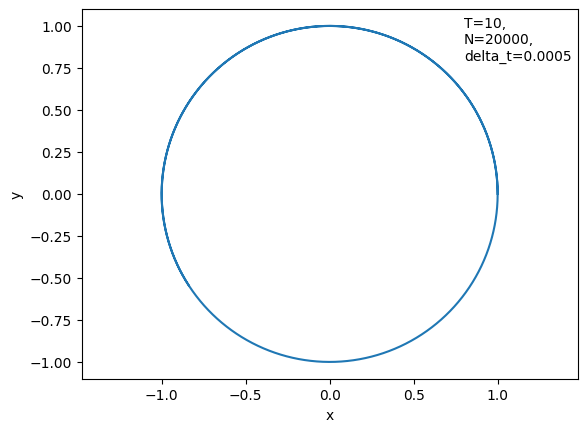

In [43]:
T = 10     # Tiempo de integración.
N = 20000 # Cantidad de pasos.
delta_t = T/N
U = zeros((N+1, 4))

U[0, :] = array([1, 0, 0, 1]) 

dim_x = len(U[0,:])

h = 1e-10

newton_tol = 1e-10
max_iter_newton = 2000

for n in range(0, N):
    # Resolver la función de Crank-Nicolson mediante Newton-Raphson.

    # Estimación inicial para el método de Newton-Raphson.

    x_k = U[n, :]

    for k in range(0, max_iter_newton):
        
        # Cálculo del Jacobiano de la función objetivo del método de Crank-Nicolson 
        
        J = zeros((dim_x, dim_x))
        h_vector = zeros(dim_x)
        
        for j in range(0, dim_x):
            h_vector[j] = h
            f_u_plus = 0.5*(F(x_k+h_vector) + F(U[n,:]))-((x_k+h_vector-U[n,:])/delta_t)
            f_u_minus = 0.5*(F(x_k-h_vector) + F(U[n,:]))-((x_k-h_vector-U[n,:])/delta_t)
            J[:, j] = (f_u_plus-f_u_minus)/(2*h)
            h_vector[j] = 0
        
        # Cálculo de -f(x_n)
        minus_f_n = -(0.5*(F(x_k)+F(U[n,:])) -((x_k-U[n,:])/delta_t))
        # Se resuelve el sistema J_n (x_(k+1)-x_k) = -f(x_k) y calcular x_(k+1)
        newton_iter_diff = solve(J, minus_f_n)

        x_k_plus_one = x_k + newton_iter_diff
        # Se acutaliza la variable para la siguiente iteración
        x_k = x_k_plus_one
        if(norm(newton_iter_diff)<newton_tol):
            # Se guarda la solución en U_{n+1}
            U[n+1,:] = x_k
            break

plt.axis("equal")
plt.plot(U[:, 0], U[:, 1], label=f"N={N}, delta_t={delta_t}")
plt.xlabel("x")
plt.ylabel("y")
plt.text(x=0.8, y=0.8, s=f"T={T},\nN={N},\ndelta_t={delta_t}")
plt.show()
    

## 1.3. Resolución mediante el método de Runge-Kutta de cuarto orden (RK4)

El método de Runge-Kutta permite resolver problemas del valor inicial de la forma
$$
\begin{cases}
\frac{dy}{dt}=f(y,t),\\
y(t_{0})=y_{0}.
\end{cases}
$$

Seleccionando una amplitud de paso, $h$, se calcula explícitamente el valor de $y_{n+1}\approx y(t_{n+1})$ como
$$
 \begin{cases}
 y_{n+1} = y_{n}+\frac{h}{6}(k_{1}+2k_{2}+2k_{3}+k_{4}),\\
 t_{n+1} = t_{n}+h,
 \end{cases}
$$
donde los coeficientes $k_{i}$ vienen dados por
$$ 
\begin{cases}
k_1 = f(y_{n}, t_{n}),\\
k_2 = f(y_{n}+h\frac{k_{1}}{2}, t_{n}+\frac{h}{2}),\\
k_3 = f(y_{n}+h\frac{k_{2}}{2}, t_{n}+\frac{h}{2}),\\
k_4 = f(y_{n}+hk_{3}, t_{n}+h).
\end{cases}
$$

Para el caso del problema de Kepler, basta con considerar $y=\mathbf{U}$, $f(y,t)=\mathbf{F}(\mathbf{U})$, con la consecuente simplificación en los coeficientes $k_{i}$.

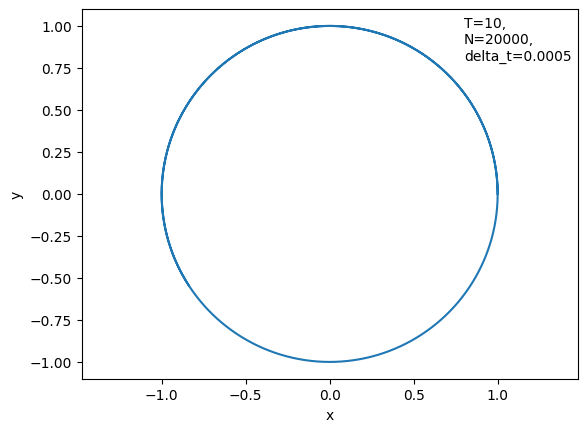

In [44]:
T = 10     # Tiempo de integración
N = 20000 # Cantidad de pasos.
delta_t = T/N
U = zeros((N+1, 4))

U[0, :] = array([1, 0, 0, 1]) 

for n in range(0, N):

    k1 = F(U[n,:])
    k2 = F(U[n,:]+0.5*k1*delta_t)
    k3 = F(U[n,:]+0.5*k2*delta_t)
    k4 = F(U[n,:]+k3*delta_t)
    U[n+1,:] = U[n,:] + (1.0/6.0)*delta_t*(k1 + 2*(k2+k3) + k4)

# Representación de los resultados.
plt.axis("equal")
plt.plot(U[:, 0], U[:, 1], label=f"N={N}, delta_t={delta_t}")
plt.xlabel("x")
plt.ylabel("y")
plt.text(x=0.8, y=0.8, s=f"T={T},\nN={N},\ndelta_t={delta_t}")
plt.show()

## 1.4. Efectos de la cantidad de pasos de tiempo en la convergencia

En los siguientes *snippets* se encapsulan los *scripts* anteriores para comprobar el efecto del valor de $\Delta t$ sobre la convergencia de la órbita. 

### Integración mediante el método de Euler para distintos valores de $\Delta t$.

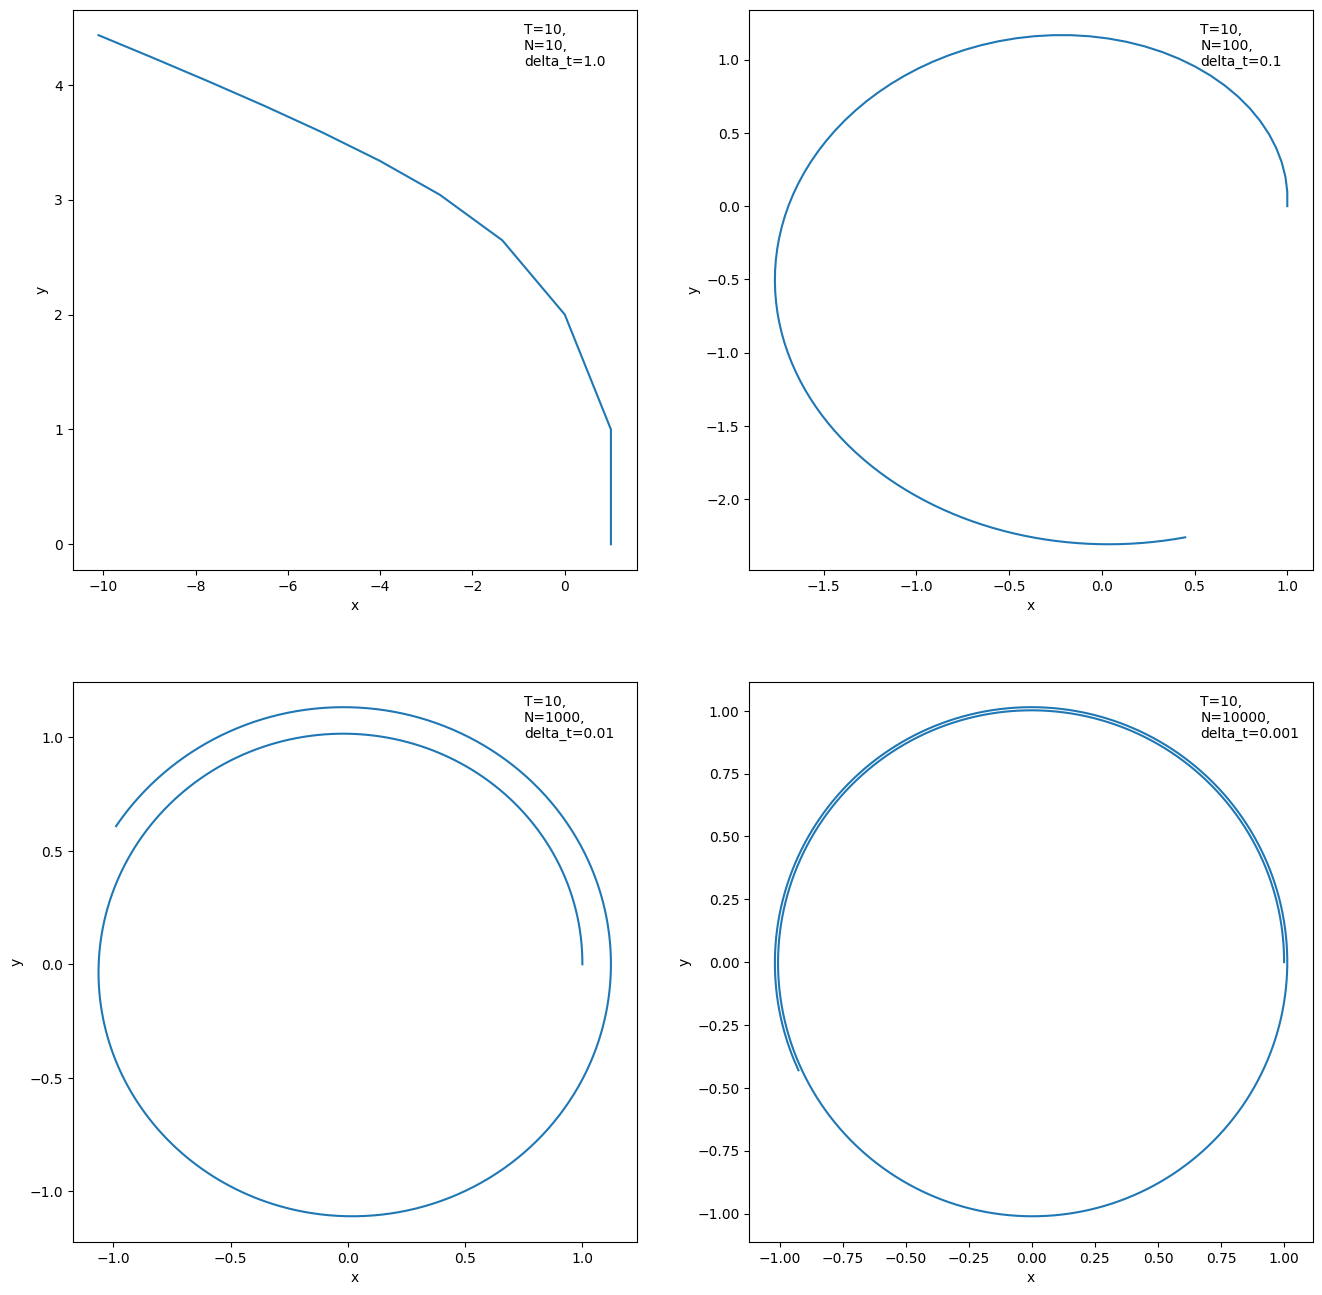

In [46]:
T = 10   # Intervalo de tiempo a integrar.

def Euler_integration(N):
    U = zeros((N+1, 4))
    U[0, :] = array([1, 0, 0, 1]) 
    delta_t = T/N 
    for n in range(0, N):
        # Compute each step of Euler's method    
        U[n+1,:] = U[n,:] + delta_t * F(U[n, :])
    
    return U

N_iter = [10, 100, 1000, 10000]

fig, axes = plt.subplots(2,2, figsize=(16,16))

for N_index, N in enumerate(N_iter):
    U = Euler_integration(N)
    delta_t = T/N
    ax = axes[N_index//2, N_index % 2]
    ax.plot(U[:, 0], U[:, 1], label=f"N={N},\ndelta_t={delta_t}")
    ax.text(0.8, 0.9, s=f"T={T},\nN={N},\ndelta_t={delta_t}", transform=ax.transAxes)
    ax.set_xlabel("x")
    ax.set_ylabel("y")

    
plt.show()

### Integración mediante el método de Crank-Nicolson para distintos valores de $\Delta t$.

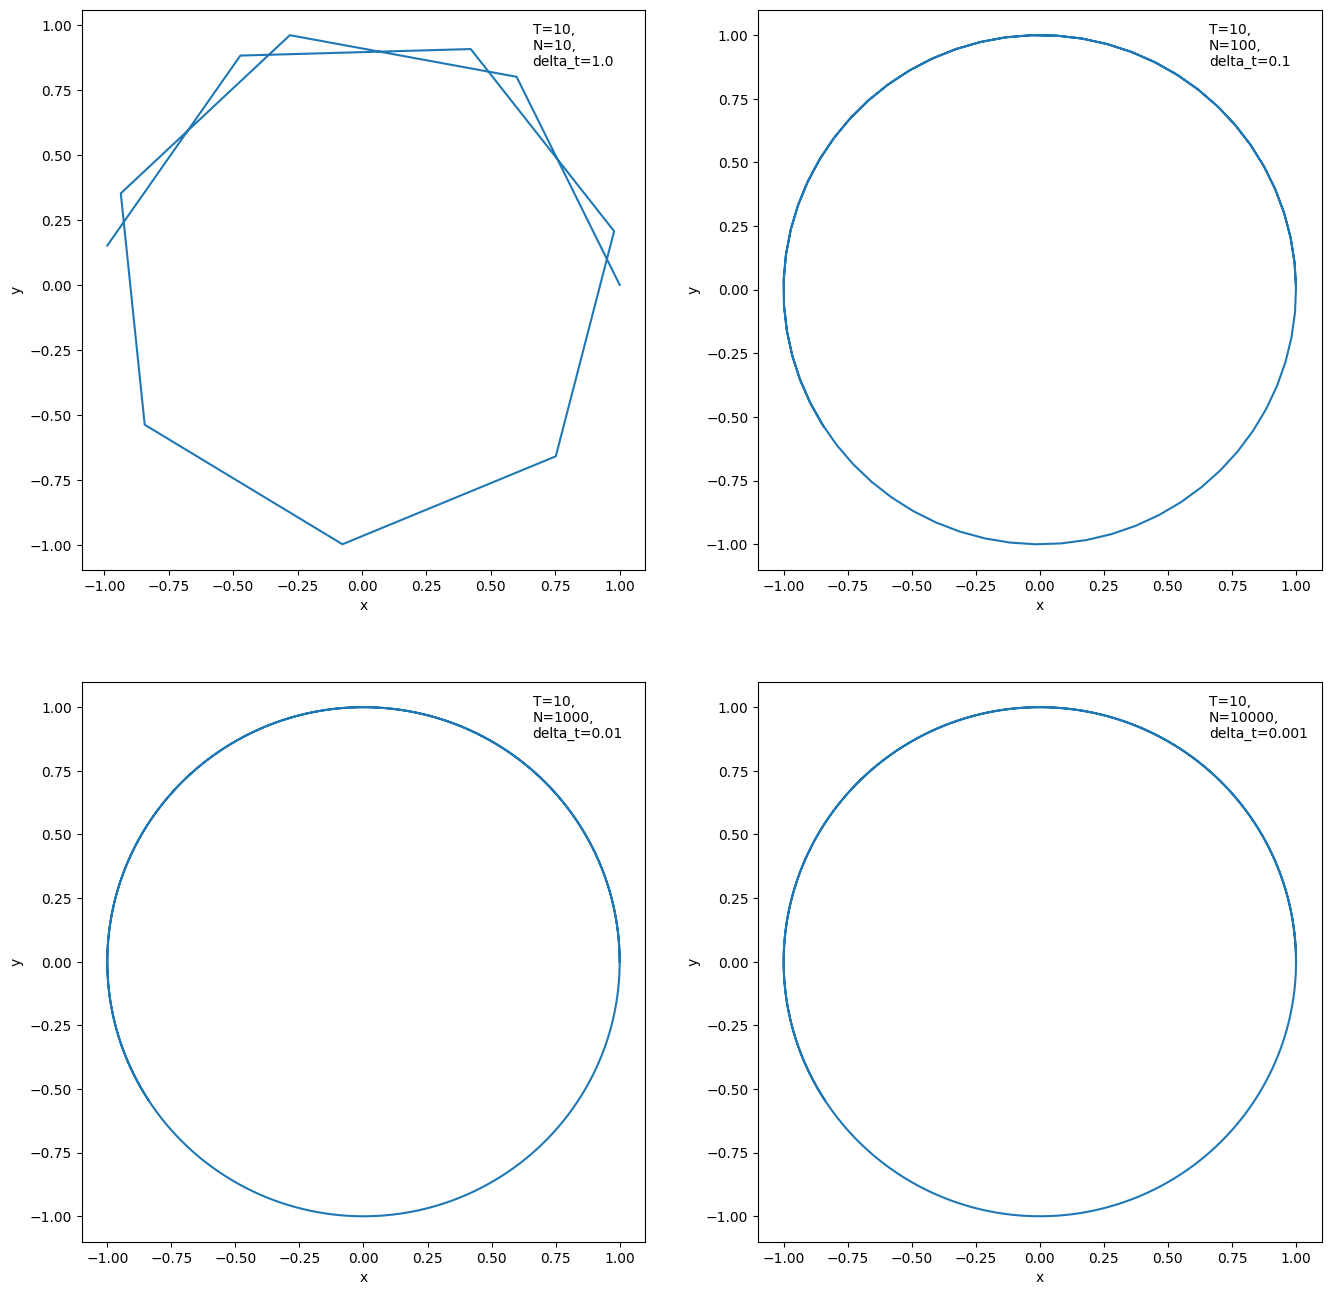

In [47]:

T = 10
h = 1e-10
newton_tol = 1e-10
max_iter_newton = 2000

def Crank_nicolson_integration(N):
    
    delta_t = T/N
    
    U = zeros((N+1, 4))

    U[0, :] = array([1, 0, 0, 1]) 

    dim_x = len(U[0,:])

    for n in range(0, N):
        # Resolver la función de Crank-Nicolson mediante Newton-Raphson.

        # Estimación inicial para el método de Newton-Raphson.

        x_k = U[n, :]

        for k in range(0, max_iter_newton):
            
            # Cálculo del Jacobiano de la función objetivo del método de Crank-Nicolson 
            
            J = zeros((dim_x, dim_x))
            h_vector = zeros(dim_x)
            
            for j in range(0, dim_x):
                h_vector[j] = h
                f_u_plus = 0.5*(F(x_k+h_vector) + F(U[n,:]))-((x_k+h_vector-U[n,:])/delta_t)
                f_u_minus = 0.5*(F(x_k-h_vector) + F(U[n,:]))-((x_k-h_vector-U[n,:])/delta_t)
                J[:, j] = (f_u_plus-f_u_minus)/(2*h)
                h_vector[j] = 0
            
            # Cálculo de -f(x_n)
            minus_f_n = -(0.5*(F(x_k)+F(U[n,:])) -((x_k-U[n,:])/delta_t))
            # Se resuelve el sistema J_n (x_(k+1)-x_k) = -f(x_k) y calcular x_(k+1)
            newton_iter_diff = solve(J, minus_f_n)

            x_k_plus_one = x_k + newton_iter_diff
            # Se acutaliza la variable para la siguiente iteración
            x_k = x_k_plus_one
            if(norm(newton_iter_diff)<newton_tol):
                # Se guarda la solución en U_{n+1}
                U[n+1,:] = x_k
                break

    return U


N_iter = [10, 100, 1000, 10000]

fig, axes = plt.subplots(2,2, figsize=(16,16))

for N_index, N in enumerate(N_iter):
    U = Crank_nicolson_integration(N)
    delta_t = T/N
    ax = axes[N_index//2, N_index % 2]
    ax.plot(U[:, 0], U[:, 1], label=f"N={N},\ndelta_t={delta_t}")
    ax.text(0.8, 0.9, s=f"T={T},\nN={N},\ndelta_t={delta_t}", transform=ax.transAxes)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    
plt.show()

### Integración mediante el método de Runge-Kutta 4 (RK4) para distintos valores de $\Delta t$.

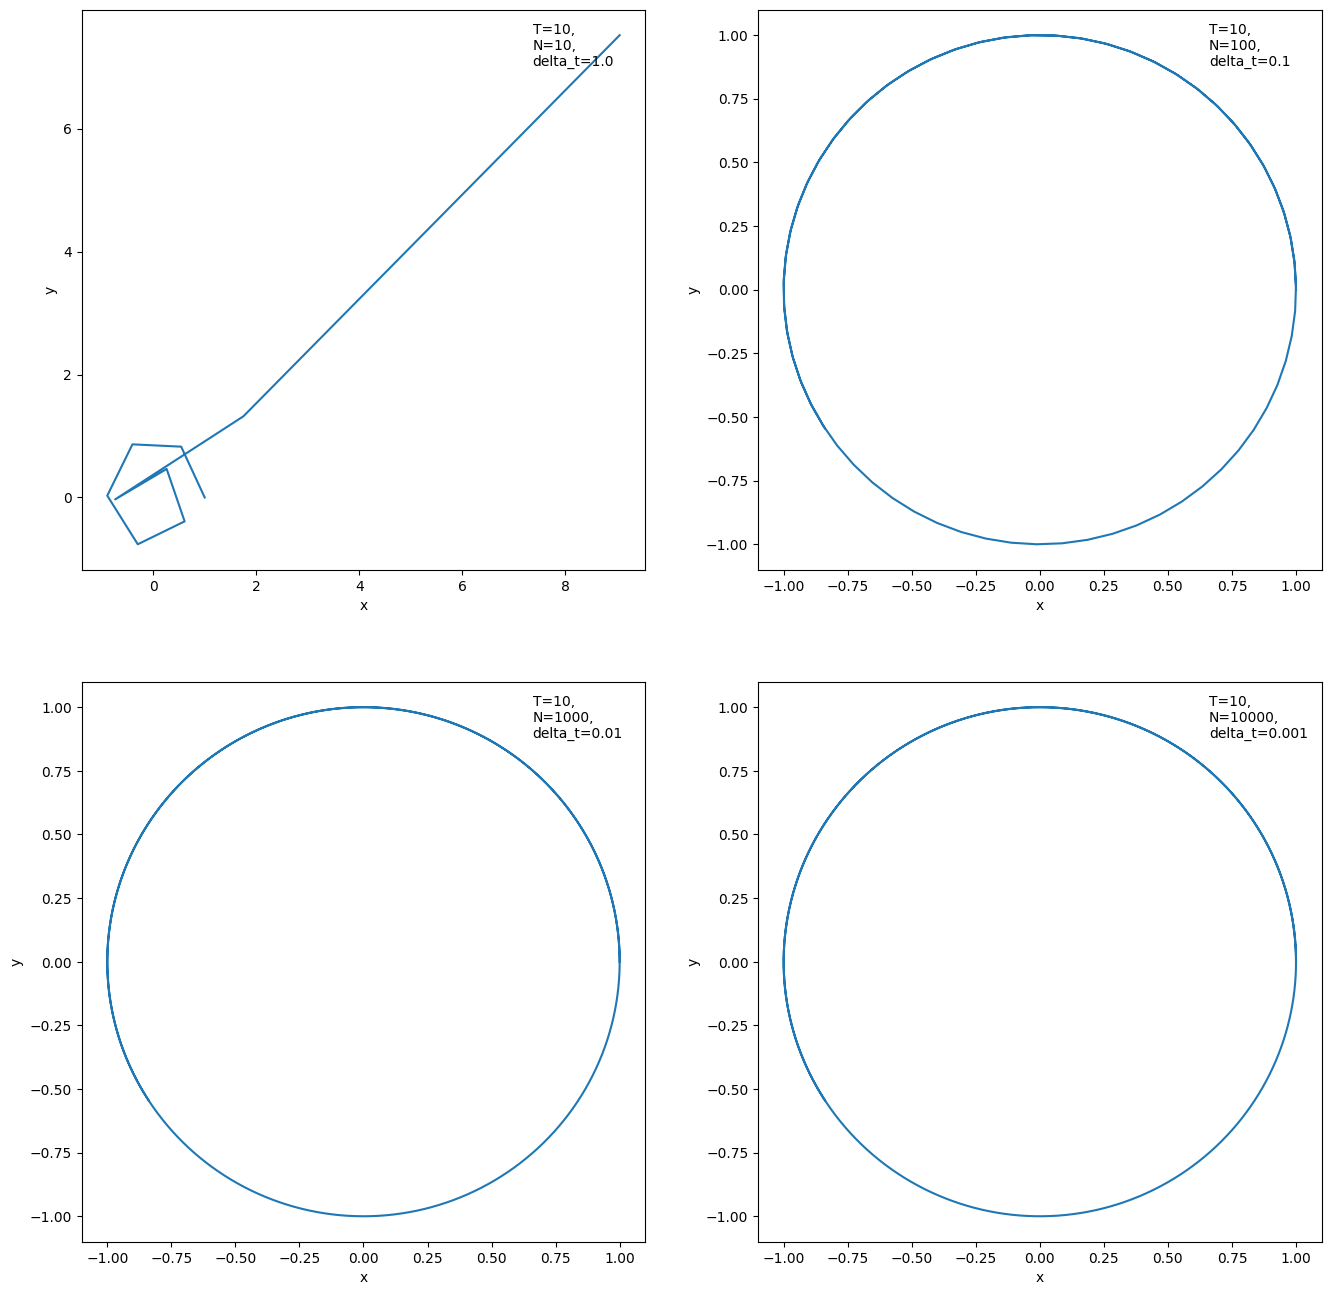

In [48]:
T = 10     # Tiempo de integración


def RK4_integration(N):
    U = zeros((N+1, 4))
    U[0, :] = array([1, 0, 0, 1]) 
    delta_t = T/N
    
    for n in range(0, N):
        k1 = F(U[n,:])
        k2 = F(U[n,:]+0.5*k1*delta_t)
        k3 = F(U[n,:]+0.5*k2*delta_t)
        k4 = F(U[n,:]+k3*delta_t)
        U[n+1,:] = U[n,:] + (1.0/6.0)*delta_t*(k1 + 2*(k2+k3) + k4)
    
    return U

N_iter = [10, 100, 1000, 10000]

fig, axes = plt.subplots(2,2, figsize=(16,16))

for N_index, N in enumerate(N_iter):
    U = RK4_integration(N)
    delta_t = T/N
    ax = axes[N_index//2, N_index % 2]
    ax.plot(U[:, 0], U[:, 1], label=f"N={N},\ndelta_t={delta_t}")
    ax.text(0.8, 0.9, s=f"T={T},\nN={N},\ndelta_t={delta_t}", transform=ax.transAxes)
    ax.set_xlabel("x")
    ax.set_ylabel("y")

    
plt.show()

Para los tres métodos numéricos, se observa que aumentar la cantidad de pasos dado un intervalo de tiempo determinado mejora significativamente la precisión de los resultados. Esto se debe a la acumulación de errores numéricos en cada iteración, que es mayor para distancias temporales más grandes entre los instantes en los que se resuelva el problema. 

Se observa además que para los métodos de Euler y de Runge-Kutta (RK4), valores de $\Delta t\approx 1$, la acumulación de errores genera una divergencia de la órbita circular, mientras que para Crank-Nicolson (CN) dicha divergencia es menos acusada. Los resultados también muestran que el método de Euler requiere mayor cantidad de pasos que RK4 y CN para alcanzar una solución circular cerrada. Para $\Delta t \approx 10^{-3}$, se obtienen órbitas circulares cerradas mientras que el método de Euler requiere $\Delta t \approx 10^{-4}$ para obtener resultados con precisión similar.

Se concluye, finalmente, que para el problema de Kepler, Crank-Nicolson y Runge-Kutta 4 son preferibles al método de Euler. Entre estos dos últimos, Runge-Kutta es el más eficiente en términos de tiempo de ejecución y de número de operaciones, dado que RK4 es un método explícito y Crank-Nicolson es implícito, por lo que el segundo debe incluir la resolución numérica de la ecuación implícita. 